<a href="https://colab.research.google.com/github/obielin/Bitcoin-price-Prediction/blob/main/Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving coin_Bitcoin.csv to coin_Bitcoin (1).csv


In [2]:
#import json

# Assuming your JSON file is named 'cryptocurrency_data.json'
#with open('CurrencyJSONDataSet.json') as f:
 #   df = json.load(f)

In [3]:
import pandas as pd
import seaborn as sns
import datetime as dt
from plotly.express import histogram, density_contour
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from itertools import cycle

df = pd.read_csv('coin_Bitcoin.csv')
# Convert JSON data to DataFrame
#df = pd.DataFrame(df)


In [4]:
print(df.head())

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


In [5]:
#Understand the shape of dataset
df.shape

(2991, 10)

In [6]:
#Get general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [7]:
#check for missing values in the dataframe
df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [8]:
#Creation of a variable for predicting '5' days out into the future
projection_Bitcoin = 5
#creation of a new column with a name prediction
df['Prediction'] = df[['Close']].shift(-projection_Bitcoin)
df


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Prediction
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,112.500000
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,115.910004
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,112.300003
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,111.500000
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,113.566002
...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,NaN
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,NaN
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,NaN
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,NaN


In [9]:
# Summary statistics
print(df.describe())

               SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap    Prediction  
count  2.991000e+03  2.991000e+03   2986.000000  
mean   1.090633e+10  1.208761e+11   6722.326264  
std    1.888895e+10  2.109438e+11  11304.377350  
min    0.000000e+00  7.784112e+08     68.431000  
25%    3.036725e+07  6.305579e+09    432.408005

histograms plots for numerical columns like Price and to understand their distribution (normal, skewed, etc.)

In [10]:
# Interactive histogram for Price
fig_hist_price = histogram(df, x="Prediction", title="Price Distribution")
fig_hist_price.update_layout(xaxis_title="Price", yaxis_title="Count")
fig_hist_price.show()

In [11]:
# Interactive histogram for Price
fig_hist_volume = histogram(df, x="Volume", title="Volume Distribution")
fig_hist_volume.update_layout(xaxis_title="Volume", yaxis_title="Count")
fig_hist_volume.show()

In [12]:
# Interactive histogram for Price
fig_hist_high = histogram(df, x="High", title="High Distribution")
fig_hist_high.update_layout(xaxis_title="High", yaxis_title="Count")
fig_hist_high.show()

In [13]:
# Interactive histogram for Price
fig_hist_Low = histogram(df, x="Low", title="Low Distribution")
fig_hist_Low.update_layout(xaxis_title="Low", yaxis_title="Count")
fig_hist_Low.show()

In [14]:
visualize_Bitcoin = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df, x=df.Date, y=[df['Open'], df['Close'],
                                          df['High'], df['Low'],df['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Bitcoin', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_Bitcoin)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Area chart for daily prices

In [15]:
area = px.area(data_frame = df ,
               y = "Prediction",
               x="Date",
               title = 'Bitcoin (BTC) Daily Price')

area.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,
    title = {
        'text': 'Bitcoin(BTC) Daily Price (2013-Present)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

area.show()

Time series plots using Candlestick Chart

In [16]:
candle_stick = go.Figure(data = [go.Candlestick(x =df["Date"],
                                               open = df[('Open')],
                                               high = df[('High')],
                                               low = df[('Low')],
                                               close = df[('Prediction')])])
candle_stick.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

candle_stick.update_layout(
    title = {
        'text': 'Bitcoin(BTC) Daily Price(2013-Present) Candelstick Chart',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

candle_stick.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
candle_stick.show()


In [17]:
ohlc_chart = go.Figure(data = [go.Ohlc(x = df["Date"],
                                               open = df[('Open')],
                                               high = df[('High')],
                                               low = df[('Low')],
                                               close = df[('Prediction')])])

ohlc_chart.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

ohlc_chart.update_layout(
    title = {
        'text': 'Bitcoin(BTC) Daily Price(2013-Present) OHLC Chart',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")
ohlc_chart.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
ohlc_chart.show()


Daily Percentage Change

In [18]:
line = px.line(data_frame=df,
               x = "Date" ,
               y="Marketcap",
               title = 'Bitcoin (BTC) Market Cap(2010-Present)')

line.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

line.update_yaxes(title_text = 'Perctange Change', ticksuffix = '%')
line.update_layout(showlegend = True,
    title = {
        'text': 'Bitcoin (BTC) Daily Percentage Change(2013-Present)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        template="plotly_white")

line.show()

### Correlation matrix:
- Calculate the correlation matrix using df.corr() to identify potential relationships between different features.
- Visualize the correlation using a heatmap to see which features move together.

<ipython-input-19-bd3c8db5813e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



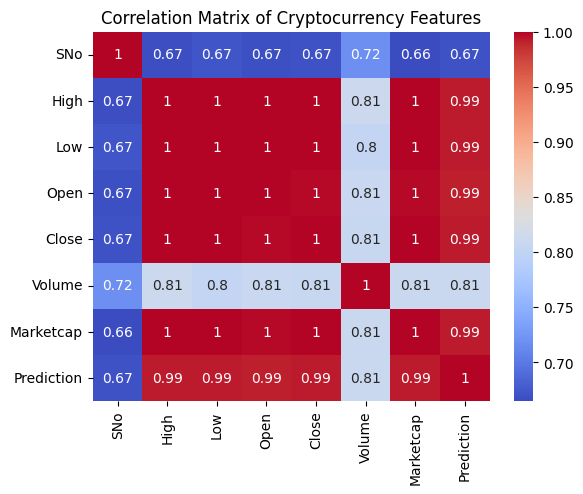

In [19]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Cryptocurrency Features')
plt.show()

Price Prediction

In [20]:
import numpy as np
#Creation of the independent data set (X)
X_df = np.array(df[['Close']])
X_df = X_df[:-projection_Bitcoin]
print(X_df)

[[  144.53999329]
 [  139.        ]
 [  116.98999786]
 ...
 [35867.77773549]
 [35040.83724889]
 [33572.11765253]]


In [21]:
#creation of the dependent data set (y)
y_df = df['Prediction'].values
y_df= y_df[:-projection_Bitcoin]
print(y_df)

[  112.5          115.91000366   112.30000305 ... 35287.77976616
 33746.00245614 34235.19345116]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df,y_df,test_size=0.20)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize models
linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor()
svr_model = SVR()

# Train models
linear_reg_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)
svr_model.fit(x_train, y_train)

# Predictions
linear_reg_preds = linear_reg_model.predict(x_test)
random_forest_preds = random_forest_model.predict(x_test)
svr_preds = svr_model.predict(x_test)

# Evaluate models
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
svr_mse = mean_squared_error(y_test, svr_preds)

print("Linear Regression MSE:", linear_reg_mse)
print("Random Forest MSE:", random_forest_mse)
print("SVR MSE:", svr_mse)


Linear Regression MSE: 2246206.403548892
Random Forest MSE: 2699710.985142922
SVR MSE: 141050158.42701533


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Assume you have already defined X_df and y_df

# Step 1: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20)

# Step 2: Train the models
linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor()

linear_reg_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)

# Step 3: Evaluate the models
linear_reg_score = linear_reg_model.score(x_test, y_test)
random_forest_score = random_forest_model.score(x_test, y_test)

print("Linear Regression R-squared:", linear_reg_score)
print("Random Forest R-squared:", random_forest_score)


Linear Regression R-squared: 0.985123979403748
Random Forest R-squared: 0.9814651397938301


In [31]:
x_projection_Bitcoin = np.array(df[['Close']])[-projection_Bitcoin:]
print(x_projection_Bitcoin)

[[33897.04858963]
 [34668.54840182]
 [35287.77976616]
 [33746.00245614]
 [34235.19345116]]


In [32]:
linReg_prediction_Bitcoin = linear_reg_model.predict(x_projection_Bitcoin)
print(linReg_prediction_Bitcoin)

Randforest_prediction_Bitcoin = random_forest_model.predict(x_projection_Bitcoin)
print(Randforest_prediction_Bitcoin)

[33888.7854903  34658.37095141 35276.06579401 33738.11415318
 34226.09130045]
[36191.87998578 35662.12466158 37294.33037218 34531.53392079
 36857.76892391]


In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already made predictions
#linReg_predictions = linear_reg_model.predict(x_test)
#randForest_predictions = random_forest_model.predict(x_test)

# Calculate RMSE for Linear Regression
linReg_rmse = np.sqrt(mean_squared_error(x_projection_Bitcoin, linReg_prediction_Bitcoin))
print("Linear Regression RMSE:", linReg_rmse)

# Calculate RMSE for Random Forest
randForest_rmse = np.sqrt(mean_squared_error(x_projection_Bitcoin, Randforest_prediction_Bitcoin))
print("Random Forest RMSE:", randForest_rmse)


Linear Regression RMSE: 9.530487102739757
Random Forest RMSE: 1885.452308993487
